In [1]:
import torch
import matplotlib.pyplot as plt
import random
# Parameters for the linear model
m = 1.5  # slope
c = 8  # intercept
n_samples = 1000  # number of samples
noise = 0.5 # standard deviation of the noise

# Generate the dataset
x , noise = torch.arange(1,501).type(torch.float).unsqueeze(dim=1) , torch.randn(500).type(torch.float).unsqueeze(dim = 1)


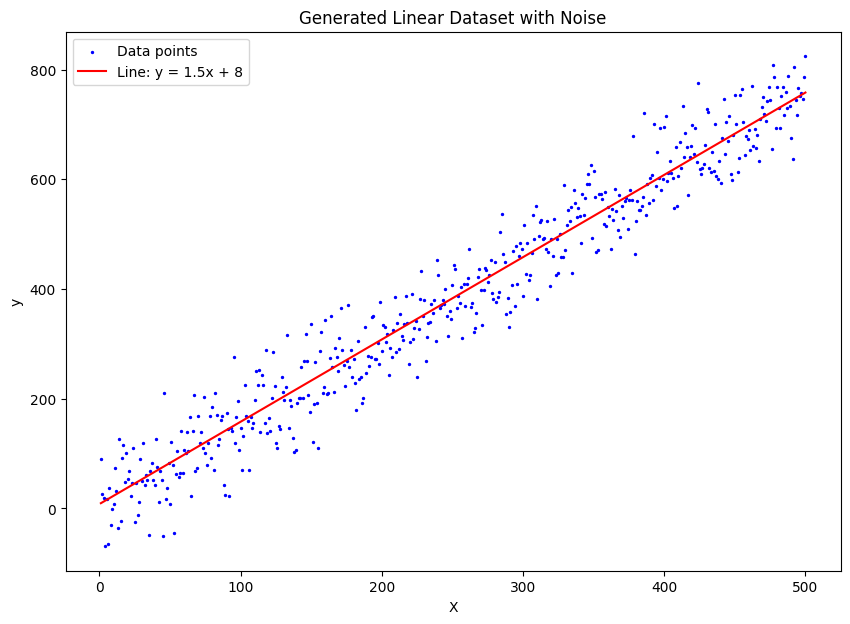

In [2]:
# Adjust the data to match the desired line y = mx + c
y = m * x + c + noise*50

# Plot the dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, color='blue',s=2, label='Data points')
plt.plot(x, m * x + c, color='red', label=f'Line: y = {m}x + {c}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Generated Linear Dataset with Noise')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 1234 , shuffle = True)

In [4]:
def plot_predictions(X_train=X_train  , y_train=y_train, X_test=X_test, y_test=y_test , y_predictions=None)->None :
  plt.figure(figsize = (10,7))
  plt.scatter(X_train , y_train , c = "b" ,s = 2 , label = "training points")
  plt.scatter(X_test , y_test , c = "g" ,s = 4  , label = "testing points")
  plt.plot(x , m*x+c , c = "purple" , label = "Desired Line" )
  if(y_predictions is not None):
    plt.scatter(X_test , y_predictions , c = "r" , s = 8 , label = "predicted points")
  plt.legend()


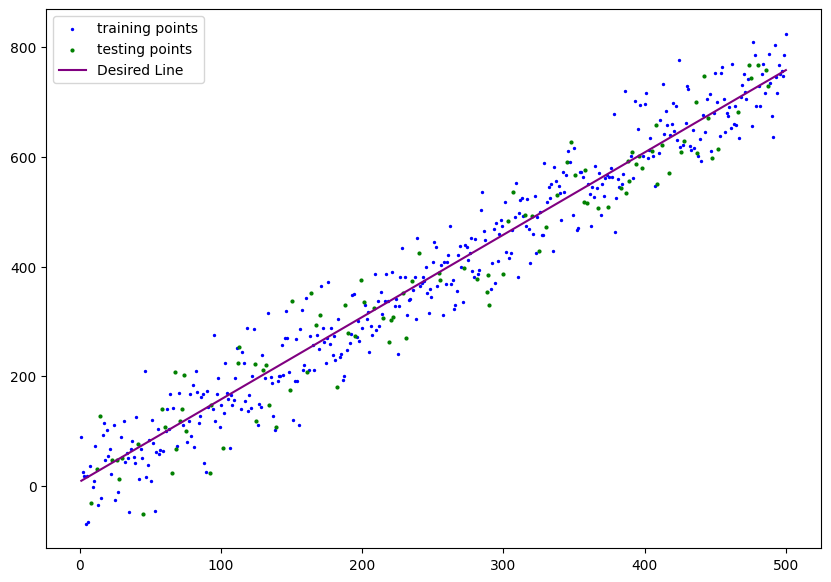

In [5]:
plot_predictions()

In [64]:
# making a simple model -> model_0
from torch import nn

class Lin_class(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 1 , out_features = 4)
    self.layer_2 = nn.Linear(in_features = 4 , out_features = 8)
    self.layer_3 = nn.Linear(in_features = 8 , out_features = 4)
    self.layer_4 = nn.Linear(in_features = 4 , out_features = 1)
    self.sig = nn.Sigmoid()
    self.rel = nn.ReLU()
  def forward(self , X:torch.Tensor)->torch.Tensor :
    return self.layer_4(self.sig(self.layer_3((self.layer_2(self.sig(self.layer_1(self.rel(X))))))))

In [99]:
torch.manual_seed(1234)
model_0 = Lin_class()

In [100]:
epochs_count:list = [0]
train_loss_vals:list = []
test_loss_vals:list = []


In [101]:
loss_fn = nn.L1Loss()
optim_fn = torch.optim.Adam(params = model_0.parameters() , lr = 0.01)


In [103]:
for epoch in range(30001):
  model_0.train()
  y_preds = model_0(X_train)
  loss = (loss_fn(y_preds , y_train))
  optim_fn.zero_grad()
  loss.backward()
  optim_fn.step()

  model_0.eval() # evaluation mode <- not letting our model see test data
  with torch.inference_mode():
    y_test_preds = model_0(X_test)
    test_loss = loss_fn(y_test_preds , y_test)
  if epoch % 2500 == 0 : print(f"Epoch_num : {epoch} | train_loss : {loss} | test_loss : {test_loss}")
  epochs_count.append(epochs_count[-1]+1)
  train_loss_vals.append(loss)
  test_loss_vals.append(test_loss)

Epoch_num : 0 | train_loss : 383.0002746582031 | test_loss : 376.55096435546875
Epoch_num : 2500 | train_loss : 317.1606750488281 | test_loss : 311.8810119628906
Epoch_num : 5000 | train_loss : 258.82330322265625 | test_loss : 257.4085693359375
Epoch_num : 7500 | train_loss : 213.8190460205078 | test_loss : 213.3135986328125
Epoch_num : 10000 | train_loss : 166.6581268310547 | test_loss : 164.13650512695312
Epoch_num : 12500 | train_loss : 131.49403381347656 | test_loss : 131.7255401611328
Epoch_num : 15000 | train_loss : 103.50212097167969 | test_loss : 104.76310729980469
Epoch_num : 17500 | train_loss : 77.32281494140625 | test_loss : 77.61817932128906
Epoch_num : 20000 | train_loss : 59.787879943847656 | test_loss : 59.266395568847656
Epoch_num : 22500 | train_loss : 48.471221923828125 | test_loss : 50.78529739379883
Epoch_num : 25000 | train_loss : 42.62128448486328 | test_loss : 50.3754768371582
Epoch_num : 27500 | train_loss : 40.527740478515625 | test_loss : 45.020233154296875


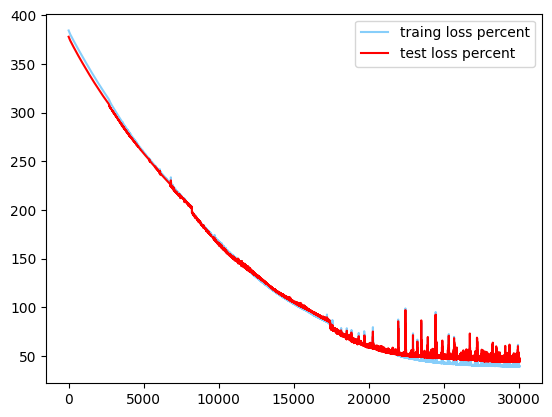

In [163]:
plt.plot(epochs_count[1:] , torch.tensor(train_loss_vals),c="lightskyblue",label = "traing loss percent")
plt.plot(epochs_count[1:] , torch.tensor(test_loss_vals),c="red",label = "test loss percent")
plt.legend()

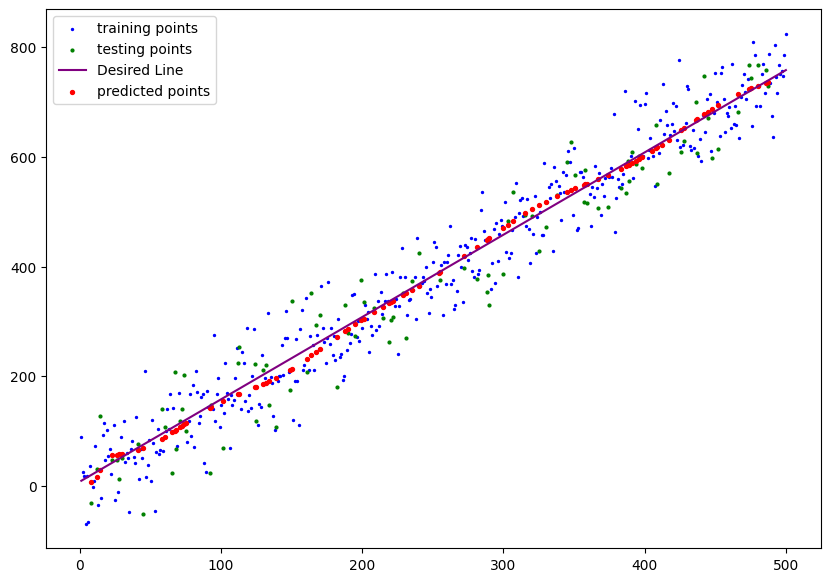

In [90]:
plot_predictions(y_predictions = y_test_preds)

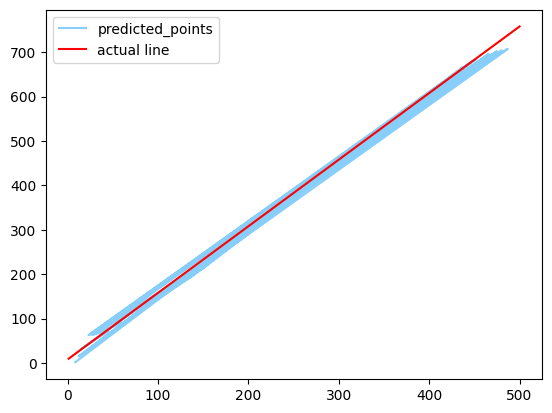

In [154]:
plt.plot(X_test,y_test_preds , c = "lightskyblue",label ="predicted_points")
plt.plot(x , x*m + c, c = "red" ,label="actual line")
plt.legend()

In [149]:
#let a point and lets check how far our prediction is from actual point
px = torch.tensor([302.8]).type(torch.float)
py = px * m + c
model_0.eval()
with torch.inference_mode():
  py_pred = model_0(px)

In [150]:
py , py_pred

(tensor([462.2000]), tensor([466.5870]))

In [151]:
def magnitude( px: torch.Tensor , py:torch.Tensor) -> int:
  x = px.squeeze().numpy()
  y = py.squeeze().numpy()
  return (x**2 + y**2)**0.5

In [152]:
m1,m2=magnitude(px,py) , magnitude(px,py_pred)
m2-m1

3.6748866004692218

In [153]:
print(f"magnitude of the actual point : {m1} \nmagnitude of predicted point  : {m2}")

magnitude of the actual point : 552.554663585423 
magnitude of predicted point  : 556.2295501858922
